In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("KAG_conversion_data.csv")

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

We have two features that are variables and would be more convenient to encode them into numerical features

In [6]:
def age_avg(age_range):
    
    #we split the ages into the list and then take their avgs
    
    age_list = age_range.split('-')
    
    age_mean = (int(age_list[0]) + int(age_list[1]))/2
    
    return age_mean

In [7]:
df["age"] = df["age"].apply(age_avg)

Let us check the age function results

In [8]:
df['age'].unique()

array([32., 37., 42., 47.])

Let us encode the genders:

In [9]:
def gender_encode(gender):
    # Male is 0 and Female is 1
    if gender == 'M':
        gender_num = 0
    else:
        gender_num = 1
        
    return gender_num

In [10]:
df["gender"] = df["gender"].apply(gender_encode)

In [11]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,32.0,0,15,7350,1,1.43,2,1
1,708749,916,103917,32.0,0,16,17861,2,1.82,2,0
2,708771,916,103920,32.0,0,20,693,0,0.00,1,0
3,708815,916,103928,32.0,0,28,4259,1,1.25,1,0
4,708818,916,103928,32.0,0,28,4133,1,1.29,1,1


No Null values

In [12]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

<AxesSubplot:>

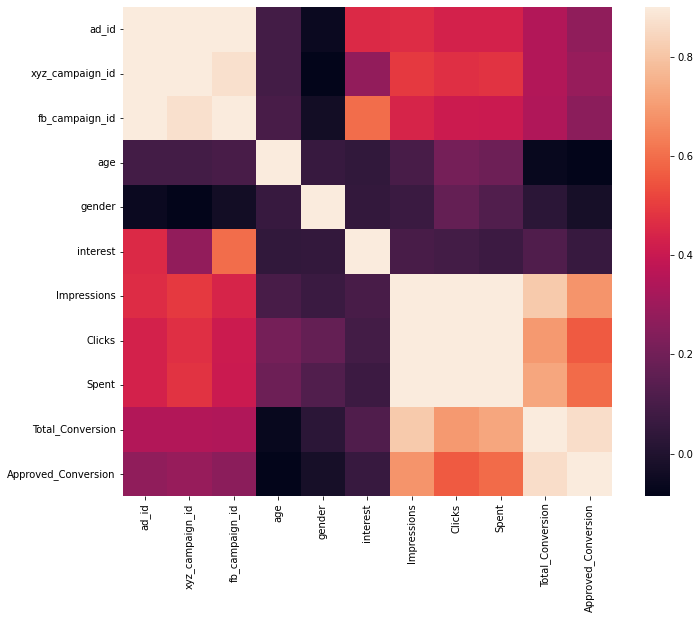

In [13]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

From the above heatmap we can observe that the amount of money spent is strongly correlated with the impressions  and clicks.

Approved conversions and Total conversion are correlated together, which is expected.

Impressions and Total conversions and approved conversions are correlated which is a good sign for the advertising campaigns. Customers tend to purchase products from brands that they are familiar or have been exposed to, hence the impressions implant such exposure and increases the chances of customers choosing the brand over the unfamiliar ones.

Although the heat map shows that the more we spend the more clicks and conversions we get, a hard conclusion cannot be reached from such correlations.

It is better we focus on a single campaign and dwelve deeper.
Let us choose the campaign that had the most money spent on it.

In [14]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [15]:
df.groupby("xyz_campaign_id")["Spent"].agg('sum').reset_index()

,xyz_campaign_id,Spent
0,916,149.710001
1,936,2893.369999
2,1178,55662.149959


<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Spent'>

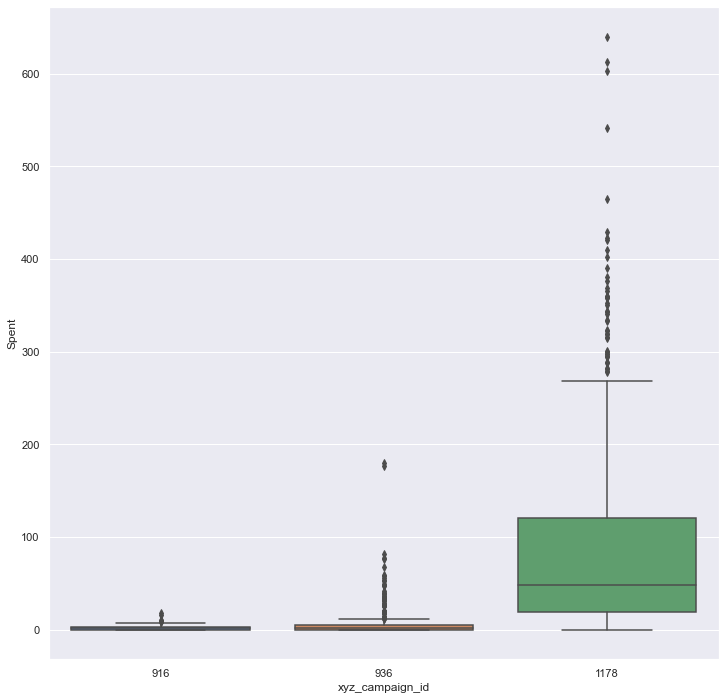

In [16]:
sns.set_theme()
fig = plt.figure(figsize = (12,12))
sns.boxplot(data=df,x = "xyz_campaign_id", y = "Spent")


We will proceed with campaign '1178' by slicing a dataframe from it.

In [17]:
df_1178 = df[df["xyz_campaign_id"] == 1178]

<AxesSubplot:xlabel='age', ylabel='Count'>

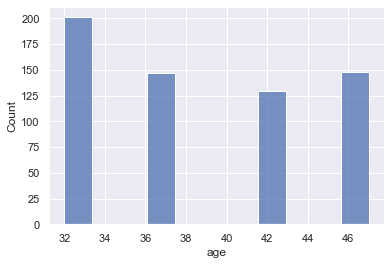

In [18]:
sns.histplot(data=df_1178, x = "age")

In [19]:
df_1178["gender_letter"] = df_1178["gender"].apply(lambda x: 'M' if x == 0 else 'F')

df_1178.head()


C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_22708\976820842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["gender_letter"] = df_1178["gender"].apply(lambda x: 'M' if x == 0 else 'F')


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_letter
518,1121091,1178,144531,32.0,0,10,1194718,141,254.049996,28,14,M
519,1121092,1178,144531,32.0,0,10,637648,67,122.400000,13,5,M
520,1121094,1178,144531,32.0,0,10,24362,0,0.000000,1,1,M
521,1121095,1178,144531,32.0,0,10,459690,50,86.330001,5,2,M
522,1121096,1178,144531,32.0,0,10,750060,86,161.909999,11,2,M


<AxesSubplot:xlabel='gender_letter', ylabel='Count'>

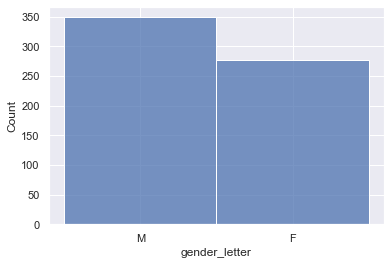

In [20]:
sns.histplot(data=df_1178, x = "gender_letter", binwidth = 1)

In [21]:
df_1178.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'gender_letter'],
      dtype='object')

<AxesSubplot:xlabel='Approved_Conversion', ylabel='Count'>

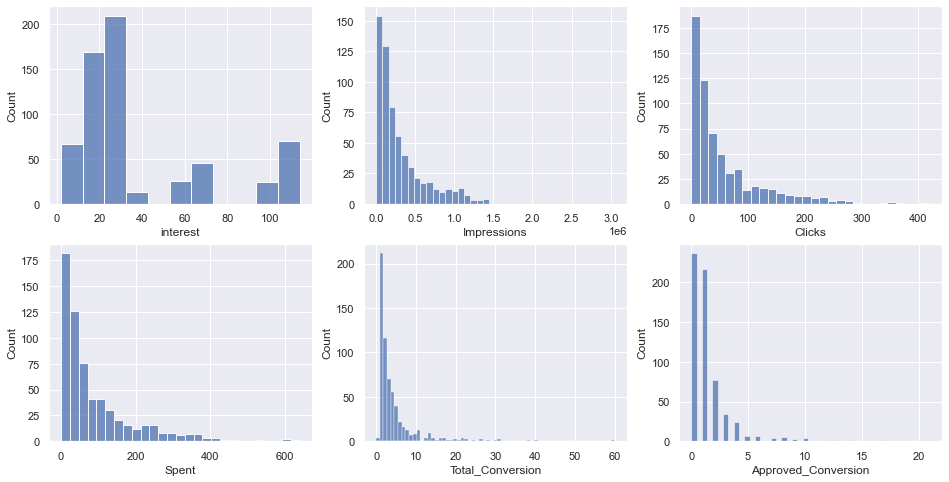

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

sns.histplot(ax=axes[0, 0], data=df_1178, x='interest')
sns.histplot(ax=axes[0, 1], data=df_1178, x='Impressions')
sns.histplot(ax=axes[0, 2], data=df_1178, x='Clicks')
sns.histplot(ax=axes[1, 0], data=df_1178, x='Spent')
sns.histplot(ax=axes[1, 1], data=df_1178, x='Total_Conversion')
sns.histplot(ax=axes[1, 2], data=df_1178, x='Approved_Conversion')

<AxesSubplot:>

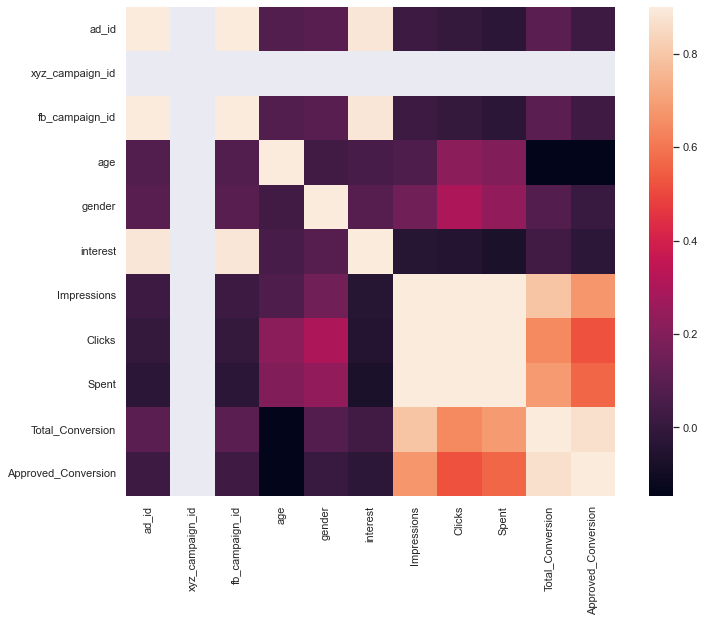

In [23]:
corrmat = df_1178.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

By looking at the campaign variable ditribution and correlations we can get an idea of what sort of questions to ask.

## Feature Engineering

We dont have the actual product that is being advertised for these campaigns so we will choose a set of data from Everlane's shirt products which have both male and female catagories.


In [24]:
everlane = pd.read_csv("Everlane Prices.csv")

In [25]:
everlane.head()

,Men,Women
0,C$140,C$352
1,C$135,C$208
2,C$300,C$62
3,C$201,C$352
4,C$197,C$227


In [26]:
everlane['Men'] = everlane['Men'].str.extract(r'^C\$([0-9]*)')

everlane['Women'] = everlane['Women'].str.extract(r'^C\$([0-9]*)')

In [27]:
everlane.head()

,Men,Women
0,140,352
1,135,208
2,300,62
3,201,352
4,197,227


In [28]:
everlane.isna().sum()

Men      51
Women    12
dtype: int64

In [29]:
everlane["Men"] = pd.to_numeric(everlane["Men"], errors='coerce')

In [30]:
everlane["Women"] = pd.to_numeric(everlane["Women"], errors='coerce')

In [31]:
everlane.dtypes

Men      float64
Women    float64
dtype: object

In [32]:
everlane["Men"].fillna(everlane["Men"].mean(),inplace = True)


In [33]:
everlane["Women"].fillna(everlane["Women"].mean(),inplace = True)

In [34]:
print("Men clothes average price is ", everlane["Men"].mean())
print("Women clothes average price is ", everlane["Women"].mean())

Men clothes average price is  128.7045454545455
Women clothes average price is  156.11023622047242


## Feature Engineering ##

So now we know for any Male and Female advertisement the Approved Conversion, appConv is worth C\\$129 and C$156 respectively. 

As we do not know the cost of an enquiry (Total Conversion, conv), we wil assume C$5.

We shall introduce some key metrics used in digial advertising:

**Click through rate (CTR):** 
Click through rate is a good metric to gauge how well our keywords and ads are performing. It is the percentage of impressions that are actually clicked.

A high CTR indicates that the ads are helpful and relevant to the target audience.

**Conversion rate (CR)**:
The conversion rate is the percentage of clicks that ultimately result in a conversion. The conversion depends on the ad campaign as it needs to be pre-defined, for some companies viewing a video on the website or generating an online quote could be considered a conversion.

**Cost per Click (CPC):**
This is basically the cost of each click.

**Cost per Conversion**: This is the cost for a single conversion.

**Return on Advertising Spend(ROAS):**
This is a very important metric as it is the generated revenue from a product campaign as a percentage of the advertising expenditure.
How relevant the ROAS is also depends on the type of company, some companies may not be too concerned about the revenue generated from these ad campaigns but instead wants to maximise the impressions upon their targetted audience. E.g. Luxury brands would want leave a bigger impression to maintain their status quo.    

**Cost per Mille (CPM)**: This is the cost of one thousand impressions, this is relevant for companies wanting to create huge impressions but needs to be mindful of their cost of branding.

In [35]:
def CTR(clicks,impr):
    
    ctr  = ((clicks/impr)*100)
    
    return ctr



In [37]:
df_1178["CTR"] = (df_1178["Clicks"]/df_1178["Impressions"] *100)

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_22708\4266724154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["CTR"] = (df_1178["Clicks"]/df_1178["Impressions"] *100)


In [38]:
df_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_letter,CTR
518,1121091,1178,144531,32.0,0,10,1194718,141,254.049996,28,14,M,0.011802
519,1121092,1178,144531,32.0,0,10,637648,67,122.400000,13,5,M,0.010507
520,1121094,1178,144531,32.0,0,10,24362,0,0.000000,1,1,M,0.000000
521,1121095,1178,144531,32.0,0,10,459690,50,86.330001,5,2,M,0.010877
522,1121096,1178,144531,32.0,0,10,750060,86,161.909999,11,2,M,0.011466
